In [2]:
import requests
import shutil

import numpy as np

# Load data from url
# Copy the file content from url to local tmp.npy file 
# then load the numpy data and return
def load_from_url(url):
  resp = requests.get(url, stream=True)
  
  with open('tmp.npy', 'wb') as f:
    shutil.copyfileobj(resp.raw, f)
   
  var = np.load('tmp.npy')
  
  return var
#인풋 데이터 datin 변수에 로드, 아웃풋 데이터는 target 변수에 로드

datin = load_from_url('https://github.com/geonhong/mlcfd/blob/master/volfrac/samples/volfrac_data.npy?raw=true')
target = load_from_url('https://github.com/geonhong/mlcfd/blob/master/volfrac/samples/volfrac_target.npy?raw=true')

print(datin.shape)
print(target.shape)





(175, 64)
(175,)


In [3]:
from keras import models
from keras import layers

# Build a model
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(16, activation='relu', input_shape=(datin.shape[1],)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

model = build_model()

Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\venv\lib\site-packag

In [5]:
dataset = datin
targets = target

print(dataset.shape)
print(dataset)
print(targets.shape)

# Shuffle data and generate train/test data set
# 80% of dataset is used to train the model and
# the rest 20% is used to test
index = np.arange(len(dataset))
np.random.shuffle(index)
print(index)

train_data = []
train_targ = []

test_data = []
test_targ = []

i = 0
ntrain = 0.8*len(dataset)

for itrg in index:
  if i<ntrain:
    train_data.append(dataset[itrg])
    train_targ.append(targets[itrg])
  else:
    test_data.append(dataset[itrg])
    test_targ.append(targets[itrg])

  i += 1

train_data = np.array(train_data)
train_targ = np.array(train_targ)

test_data = np.array(test_data)
test_targ = np.array(test_targ)
    
print("train data shape: ", train_data.shape)
print("train target shape: ", train_targ.shape)
print("test data shape: ", test_data.shape)
print("test target shape: ", test_targ.shape)

(175, 64)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(175,)
[ 96  62 171  50  47  65 139 148  54 126  15  35  77  92 102 131 104  84
  59 111 108 120 137  66  64   8 101 169  36 124  83  37 125  97  20 103
  99  63  55  71   1 151  51   4  88  68  70   2  93  14 172  25   0 117
 164  33 118 160 149  85  27  34  21 146  61  43 156 106 136   6  69  11
  16 147  41  39  87 170  10 100 152 168 157  17   7  26 127 140 154 132
  53 119  76 134  52  78 153   3  40 133  38  32 115 150  90  79  49  56
  73 166   5 128  91 123 142  30 129 122 144 141  60 107 163  42 135  45
  82 165 158 138 109  89 113  57  86  48  75  74  44 167  23  72 105  12
 155 114  22  31 143 159 112 173 145 174 116  98  58 130  24  67  80 161
  29  28  13  18  95 162  19  46 110 121   9  94  81]
train data shape:  (140, 64)
train target shape:  (140,)
test data shape:  (35, 64)
test target shape:  (35,)


In [4]:
# Fit the model
num_epochs = 400

history = model.fit(train_data, train_targ, epochs=num_epochs, batch_size=1)

val_mse, val_mae = model.evaluate(test_data, test_targ)

print("MSE: ", val_mse)
print("MAE: ", val_mae)

W0730 22:01:41.940824  8608 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\keras-2.2.4-py3.5.egg\keras\backend\tensorflow_backend.py:1021: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0730 22:01:41.945821  8608 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\keras-2.2.4-py3.5.egg\keras\backend\tensorflow_backend.py:1008: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/400
140/140 [==============================] - 0s 1ms/step - loss: 3.0231 - mean_absolute_error: 1.5206
Epoch 2/400
140/140 [==============================] - 0s 543us/step - loss: 1.0806 - mean_absolute_error: 0.8552
Epoch 3/400
140/140 [==============================] - 0s 550us/step - loss: 0.4197 - mean_absolute_error: 0.5381
Epoch 4/400
140/140 [==============================] - 0s 578us/step - loss: 0.1802 - mean_absolute_error: 0.3600
Epoch 5/400
140/140 [==============================] - 0s 564us/step - loss: 0.1180 - mean_absolute_error: 0.2876
Epoch 6/400
140/140 [==============================] - 0s 557us/step - loss: 0.0876 - mean_absolute_error: 0.2481
Epoch 7/400
140/140 [==============================] - 0s 586us/step - loss: 0.0743 - mean_absolute_error: 0.2145
Epoch 8/400
140/140 [==============================] - 0s 586us/step - loss: 0.0593 - mean_absolute_error: 0.1865
Epoch 9/400
140/140 [==============================] - 0s 578us/step - loss: 0.0477 - mean

Epoch 142/400
140/140 [==============================] - 0s 521us/step - loss: 0.0083 - mean_absolute_error: 0.0686
Epoch 143/400
140/140 [==============================] - 0s 593us/step - loss: 0.0074 - mean_absolute_error: 0.0649
Epoch 144/400
140/140 [==============================] - 0s 586us/step - loss: 0.0074 - mean_absolute_error: 0.0657
Epoch 145/400
140/140 [==============================] - 0s 600us/step - loss: 0.0076 - mean_absolute_error: 0.0676
Epoch 146/400
140/140 [==============================] - 0s 628us/step - loss: 0.0075 - mean_absolute_error: 0.0657
Epoch 147/400
140/140 [==============================] - 0s 593us/step - loss: 0.0085 - mean_absolute_error: 0.0691
Epoch 148/400
140/140 [==============================] - 0s 571us/step - loss: 0.0084 - mean_absolute_error: 0.0672
Epoch 149/400
140/140 [==============================] - 0s 593us/step - loss: 0.0080 - mean_absolute_error: 0.0684
Epoch 150/400
140/140 [==============================] - 0s 543us/step -

140/140 [==============================] - 0s 543us/step - loss: 0.0064 - mean_absolute_error: 0.0606
Epoch 283/400
140/140 [==============================] - 0s 521us/step - loss: 0.0074 - mean_absolute_error: 0.0647
Epoch 284/400
140/140 [==============================] - 0s 500us/step - loss: 0.0069 - mean_absolute_error: 0.0611
Epoch 285/400
140/140 [==============================] - 0s 578us/step - loss: 0.0074 - mean_absolute_error: 0.0675
Epoch 286/400
140/140 [==============================] - 0s 543us/step - loss: 0.0069 - mean_absolute_error: 0.0627
Epoch 287/400
140/140 [==============================] - 0s 507us/step - loss: 0.0068 - mean_absolute_error: 0.0603
Epoch 288/400
140/140 [==============================] - 0s 543us/step - loss: 0.0070 - mean_absolute_error: 0.0634
Epoch 289/400
140/140 [==============================] - 0s 571us/step - loss: 0.0071 - mean_absolute_error: 0.0653
Epoch 290/400
140/140 [==============================] - 0s 600us/step - loss: 0.0069 

In [5]:
# Evaluate the model fitting

import pandas as pd

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,epoch
395,0.006521,0.060152,395
396,0.006330,0.058962,396
397,0.006636,0.062715,397
398,0.006514,0.060427,398
399,0.006564,0.060670,399


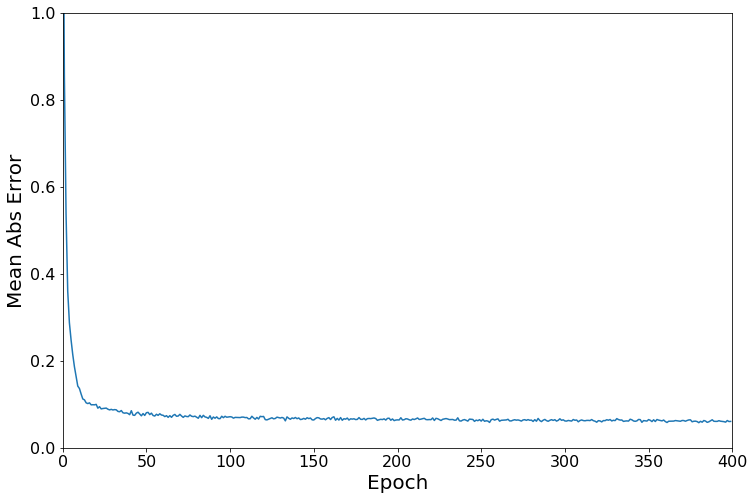

In [7]:
import matplotlib.pyplot as plt

def plot_hist(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure(figsize=(12,8))
  
  plt.xlabel('Epoch', fontsize=20)
  plt.ylabel('Mean Abs Error', fontsize=20)
  plt.plot(hist['epoch'], hist['mean_absolute_error'])
  
  plt.rc('xtick', labelsize=16)
  plt.rc('ytick', labelsize=16)
  
  plt.xlim([0,num_epochs])
  plt.ylim([0,1])
  
  plt.show()

plot_hist(history)

In [8]:
# Evaluate the model
i = 0

predicted = model.predict(test_data)

cfd_data = []
cd_pred = []

for e in test_targ:
  cfd_data.append(float(e))

for e in predicted:
  cd_pred.append(float(e))
  
diffList = []
errList = []

sum_err2 = 0.0
sum_dif2 = 0.0
count = 0

def sqr(s):
  return s*s

for i in range(0, len(cd_pred)):
  diff = float(test_targ[i]) - float(cd_pred[i])
  err = diff/float(test_targ[i])
  
  diffList.append(diff)
  errList.append(err)
  
  print(i, test_targ[i], cd_pred[i], diff, err)
  
  sum_err2 += sqr(err)
  sum_dif2 += sqr(diff)
  count += 1

def mag(li):
  lo = li
  for i in range(0, len(li)):
    lo[i] = np.sqrt(li[i]*li[i])
   
  return lo

rms_err = np.sqrt(sum_err2/count)
rms_dif = np.sqrt(sum_dif2/count)

print('-----\n')
print('Diff. min/max/rms', np.min(mag(diffList)), '/', np.max(mag(diffList)), '/', rms_dif)
print('Err.  min/max/rms', np.min(mag(errList)), '/', np.max(mag(errList)), '/', rms_err)

0 1.0874735115245002 1.1597269773483276 -0.07225346582382741 -0.06644158690590743
1 1.3713835999549104 1.4657624959945679 -0.09437889603965743 -0.06882020176029559
2 1.171557668687498 1.1506760120391846 0.02088165664831343 0.01782384017997787
3 0.5460979324352006 0.5573937892913818 -0.011295856856181286 -0.0206846724465884
4 1.8765877319897402 1.9328807592391968 -0.05629302724945662 -0.029997546232367882
5 0.348121056378343 0.3819957673549652 -0.0338747109766222 -0.09730727388063155
6 1.8395689470372592 1.7387698888778687 0.1007990581593905 0.054794933520558545
7 1.1009129535718778 1.085603952407837 0.01530900116404088 0.013905732614346395
8 2.469948091932866 2.4316158294677734 0.03833226246509236 0.01551946074911045
9 0.8602764712418834 0.8603109121322632 -3.444089037973885e-05 -4.003467667785968e-05
10 0.247964152281062 0.2522672116756439 -0.004303059394581921 -0.01735355435452015
11 1.7982537257936502 1.8027076721191406 -0.004453946325490454 -0.0024768175155731862
12 2.0080871890730

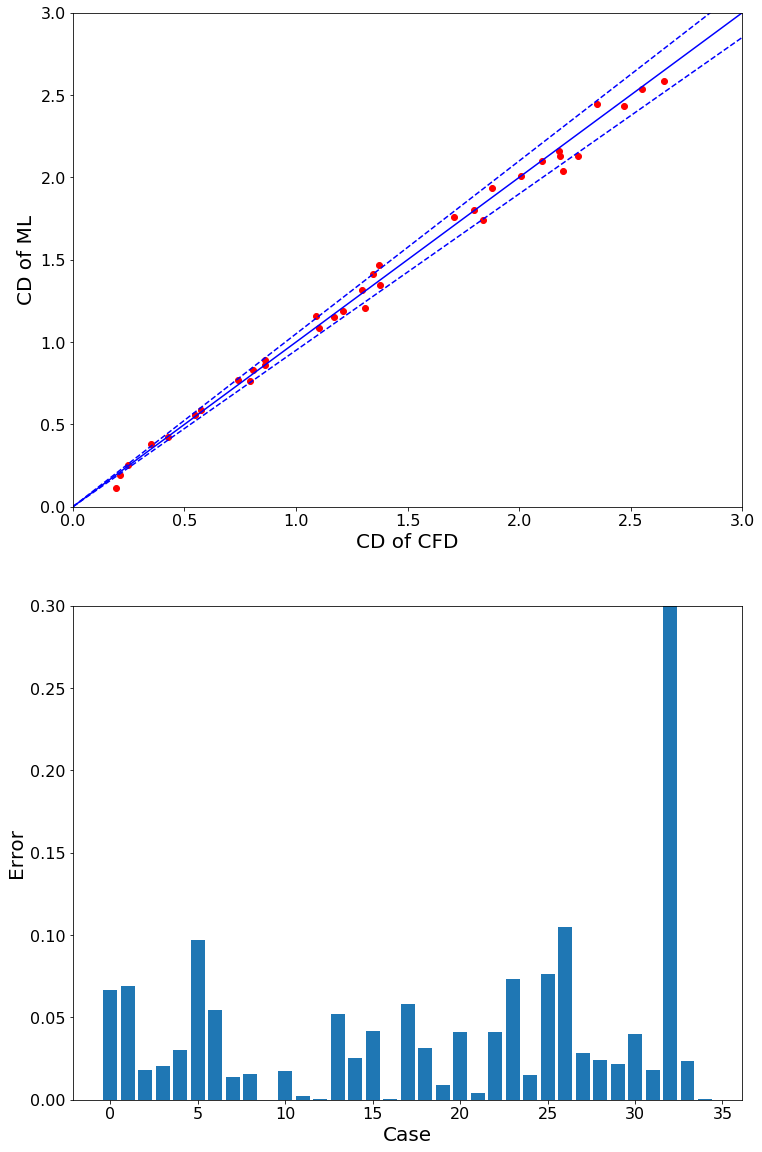

In [9]:
def plot_eval(x, y):
  plt.rcParams["figure.figsize"] = (12, 20)
  #plt.subplots_adjust(wspace=0.3)
  
  plt.subplot(2,1,1)
  plt.scatter(x, y, c='r')
  plt.plot([0,3], [0,3], 'b')
  plt.plot([0,3], [0,2.85], 'b--')
  plt.plot([0,3], [0,3.15], 'b--')
  
  plt.xlabel('CD of CFD', fontsize=20)
  plt.ylabel('CD of ML', fontsize=20)
  
  plt.xlim([0, 3])
  plt.ylim([0, 3])
  
  plt.subplot(2,1,2)
  plt.bar(range(len(errList)), errList)
  plt.xlabel('Case', fontsize=20)
  plt.ylabel('Error', fontsize=20)
  plt.ylim([0,0.3])
  
  plt.show()

plot_eval(cfd_data, cd_pred)